<a href="https://colab.research.google.com/github/Ahmed-Yasser-El-Sharkawy/Learn/blob/main/learn_Three_type_of_model_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('drive/My Drive/Data/Airline_Delay_Cause.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318017 non-null  object 
 3   carrier_name         318017 non-null  object 
 4   airport              318017 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317529 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317529 non-null  float64
 9   weather_ct           317529 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317529 non-null  float64
 15  arr_delay        

In [5]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [6]:
df=df.drop(['carrier','carrier_name','airport','airport_name'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   arr_flights          317529 non-null  float64
 3   arr_del15            317289 non-null  float64
 4   carrier_ct           317529 non-null  float64
 5   weather_ct           317529 non-null  float64
 6   nas_ct               317529 non-null  float64
 7   security_ct          317529 non-null  float64
 8   late_aircraft_ct     317529 non-null  float64
 9   arr_cancelled        317529 non-null  float64
 10  arr_diverted         317529 non-null  float64
 11  arr_delay            317529 non-null  float64
 12  carrier_delay        317529 non-null  float64
 13  weather_delay        317529 non-null  float64
 14  nas_delay            317529 non-null  float64
 15  security_delay   

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317289 entries, 0 to 318016
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317289 non-null  int64  
 1   month                317289 non-null  int64  
 2   arr_flights          317289 non-null  float64
 3   arr_del15            317289 non-null  float64
 4   carrier_ct           317289 non-null  float64
 5   weather_ct           317289 non-null  float64
 6   nas_ct               317289 non-null  float64
 7   security_ct          317289 non-null  float64
 8   late_aircraft_ct     317289 non-null  float64
 9   arr_cancelled        317289 non-null  float64
 10  arr_diverted         317289 non-null  float64
 11  arr_delay            317289 non-null  float64
 12  carrier_delay        317289 non-null  float64
 13  weather_delay        317289 non-null  float64
 14  nas_delay            317289 non-null  float64
 15  security_delay       3

## Binary Classification

In [9]:
df['weather_delay'].min(),df['weather_delay'].max()

(0.0, 57707.0)

In [10]:
df['WDCase']=df['weather_delay'].apply(lambda x : 1 if x > 100 else 0 )

In [11]:
df['WDCase'].value_counts()

WDCase
0    215128
1    102161
Name: count, dtype: int64

In [12]:
X=df.drop('WDCase',axis=1)
y=df['WDCase']

In [13]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [14]:
y

0         0
1         0
2         0
3         0
4         0
         ..
318012    1
318013    1
318014    0
318015    0
318016    1
Name: WDCase, Length: 317289, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [16]:
import tensorflow as tf
from keras.models import Sequential , load_model
from keras.layers import Dense , Dropout , Input
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping


In [17]:
kerasmodel=Sequential([
    #Input(shape=(17)),
    Dense(8,activation='tanh'),
    #Dropout(0.1),
    Dense(128,activation='tanh'),
    #Dropout(0.3),
    Dense(64,activation='tanh'),
    Dense(32,activation='tanh'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [18]:
kerasmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# kind:        loss function , metrics :
# regression : mse  ,mse
# Binary classification : binary_crossentropy , accuracy
# Multi classification  : categorical_crossentropy , accuracy

In [19]:
history=kerasmodel.fit(X_train,y_train,
                       validation_data=(X_test,y_test),
                       epochs=300,
                       batch_size=10000,
                       verbose=1,
                       callbacks=[EarlyStopping(
                       patience=10,
                       monitor='val_accuracy',#"Regression":"val_loss",
                       restore_best_weights=True)])

Epoch 1/300
24/24 [==============================] - 3s 60ms/step - loss: 0.3242 - accuracy: 0.8560 - val_loss: 0.1750 - val_accuracy: 0.9428
Epoch 2/300
24/24 [==============================] - 1s 35ms/step - loss: 0.1301 - accuracy: 0.9610 - val_loss: 0.0898 - val_accuracy: 0.9757
Epoch 3/300
24/24 [==============================] - 1s 36ms/step - loss: 0.0742 - accuracy: 0.9833 - val_loss: 0.0550 - val_accuracy: 0.9878
Epoch 4/300
24/24 [==============================] - 1s 45ms/step - loss: 0.0509 - accuracy: 0.9889 - val_loss: 0.0378 - val_accuracy: 0.9918
Epoch 5/300
24/24 [==============================] - 1s 56ms/step - loss: 0.0414 - accuracy: 0.9911 - val_loss: 0.0471 - val_accuracy: 0.9887
Epoch 6/300
24/24 [==============================] - 1s 53ms/step - loss: 0.0400 - accuracy: 0.9911 - val_loss: 0.0462 - val_accuracy: 0.9908
Epoch 7/300
24/24 [==============================] - 1s 55ms/step - loss: 0.0391 - accuracy: 0.9915 - val_loss: 0.0461 - val_accuracy: 0.9887
Epoch 

In [20]:
print(kerasmodel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 144       
                                                                 
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11665 (45.57 KB)
Trainable params: 11665 (

In [21]:
kerasmodel.save('KerasModelBinaryClassification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
## Method 2 to save model
kerasmodel.save('KerasModelBinaryClassification.model')

In [23]:
NewKerasModel=load_model('KerasModelBinaryClassification.h5')

In [24]:
y_pred=NewKerasModel.predict(X_test)

2479/2479 [==============================] - 3s 1ms/step


In [25]:
ModelLoss ,ModelAccuracy=NewKerasModel.evaluate(X_test,y_test)
print(f"Loss : {ModelLoss} ")
print(f"Accuracy : {ModelAccuracy}")

2479/2479 [==============================] - 6s 2ms/step - loss: 0.0029 - accuracy: 0.9994
Loss : 0.002853983547538519 
Accuracy : 0.9993696808815002


In [26]:

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [27]:

history.history['accuracy']

[0.8559794425964355,
 0.9610028266906738,
 0.9833211302757263,
 0.9889186024665833,
 0.9911164045333862,
 0.9910911917686462,
 0.9914861917495728,
 0.992536723613739,
 0.9944950342178345,
 0.9950581192970276,
 0.9940117597579956,
 0.9959279894828796,
 0.9961212873458862,
 0.9958943724632263,
 0.9962305426597595,
 0.9957724809646606,
 0.9962305426597595,
 0.9956632256507874,
 0.9962011575698853,
 0.9971424341201782,
 0.9976004958152771,
 0.9976047277450562,
 0.9964112639427185,
 0.9973651766777039,
 0.9980417490005493,
 0.9978358149528503,
 0.9972391128540039,
 0.9974197745323181,
 0.997882068157196,
 0.9980165362358093,
 0.9978652596473694,
 0.9977937936782837,
 0.9980249404907227,
 0.9985838532447815,
 0.9981047511100769,
 0.9976551532745361,
 0.9979913234710693,
 0.9979493021965027,
 0.9982980489730835,
 0.997978687286377,
 0.9972979426383972,
 0.9976299405097961,
 0.9975290298461914,
 0.9972391128540039,
 0.9982140064239502,
 0.9976383447647095,
 0.9981215596199036,
 0.9987140893936

<function matplotlib.pyplot.show(close=None, block=None)>

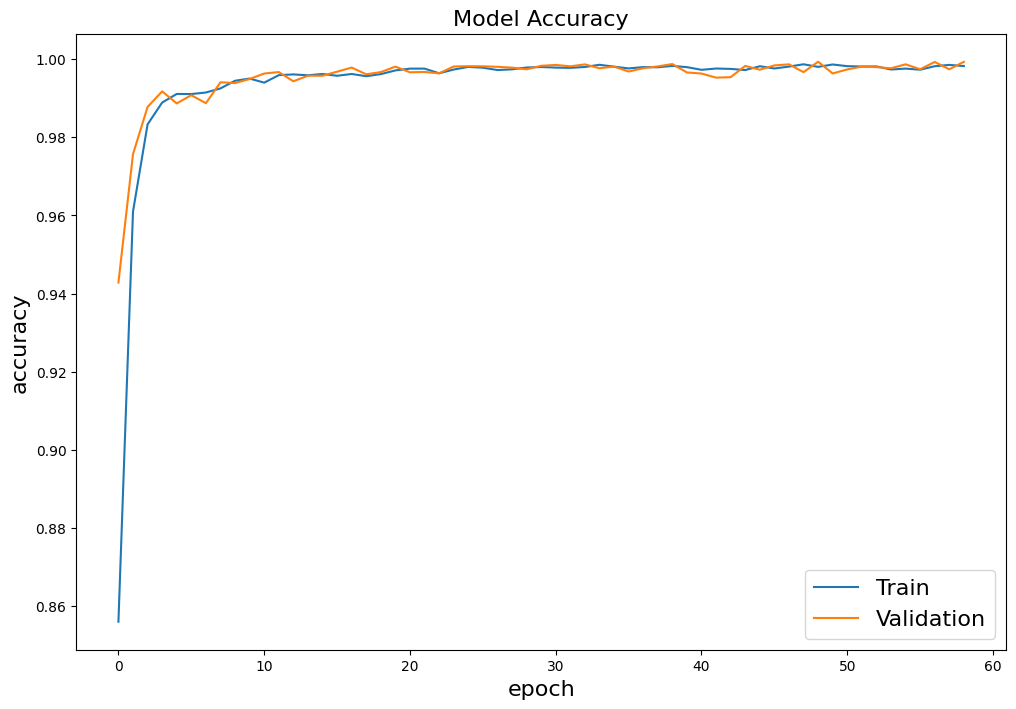

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.xlabel('epoch',fontsize=16)
plt.legend(['Train','Validation'],loc='lower right',fontsize=16)
plt.show

In [29]:
history.history['loss']

[0.3242194950580597,
 0.13010528683662415,
 0.0741967111825943,
 0.05093224719166756,
 0.04144367575645447,
 0.03999654948711395,
 0.03914352506399155,
 0.03432327136397362,
 0.026049518957734108,
 0.02387150004506111,
 0.02781832031905651,
 0.019403938204050064,
 0.018522148951888084,
 0.019814496859908104,
 0.018115663900971413,
 0.019611941650509834,
 0.017548942938447,
 0.020120300352573395,
 0.017113711684942245,
 0.01265947986394167,
 0.011434006504714489,
 0.010890352539718151,
 0.01624746061861515,
 0.011866220273077488,
 0.008721277117729187,
 0.009531885385513306,
 0.012550391256809235,
 0.011395266279578209,
 0.009269042871892452,
 0.00880313478410244,
 0.00941906962543726,
 0.009500246495008469,
 0.008496686816215515,
 0.0062091355212032795,
 0.007815232500433922,
 0.010436938144266605,
 0.008385862223803997,
 0.008358059450984001,
 0.00716992886736989,
 0.00887632928788662,
 0.012387699447572231,
 0.010334020480513573,
 0.010655825957655907,
 0.013112543150782585,
 0.00729

<function matplotlib.pyplot.show(close=None, block=None)>

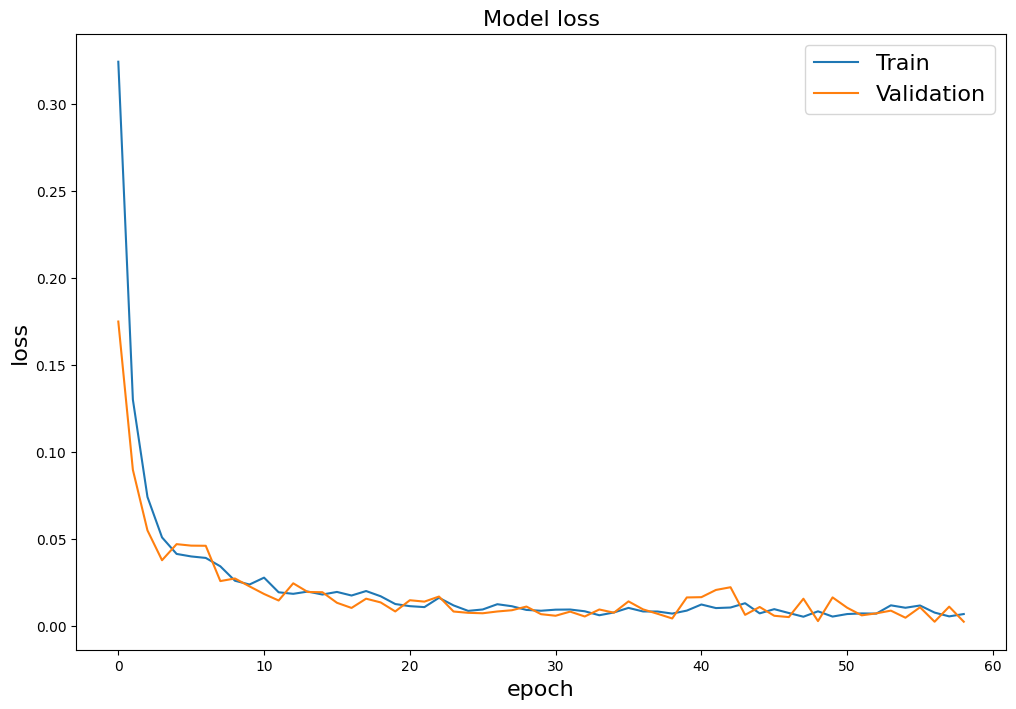

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss",fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.xlabel('epoch',fontsize=16)
plt.legend(['Train','Validation'],loc='upper right',fontsize=16)
plt.show

In [31]:
len(y_test),len(y_pred)

(79323, 79323)

In [32]:
y_pred

array([[2.1015885e-04],
       [9.9745512e-01],
       [2.1015885e-04],
       ...,
       [2.1015885e-04],
       [9.9870205e-01],
       [2.1015885e-04]], dtype=float32)

In [33]:
y_pred=[np.round(i[0]) for i in y_pred]
y_pred

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0

In [34]:
CM=confusion_matrix(y_test,y_pred)
print("confusion_matrix : \n",CM)

confusion_matrix : 
 [[53769    11]
 [   39 25504]]


<function matplotlib.pyplot.show(close=None, block=None)>

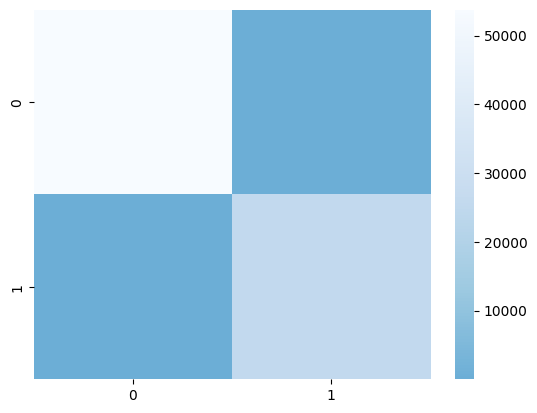

In [35]:
sns.heatmap(CM,center=True,cmap="Blues_r")
plt.show

In [36]:
Classification_Report=classification_report(y_test,y_pred)
print("classification report is : \n",Classification_Report)

classification report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53780
           1       1.00      1.00      1.00     25543

    accuracy                           1.00     79323
   macro avg       1.00      1.00      1.00     79323
weighted avg       1.00      1.00      1.00     79323



## Multi classiification

In [37]:
df['weather_delay'].min(),df['weather_delay'].max()

(0.0, 57707.0)

In [38]:
def Value(x):
    if x <= 0:
        return 0
    elif x <= 70:
        return 1
    elif x <=250:
        return 2
    else:
        return 3
df['WDCase']=df['weather_delay'].apply(lambda x : Value(x))

In [39]:
df['WDCase'].value_counts()

WDCase
0    126333
1     71956
2     61206
3     57794
Name: count, dtype: int64

In [40]:
df.head()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0


In [41]:
X=df.drop('WDCase',axis=1)
y=df['WDCase']

In [42]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [43]:
y

0         0
1         0
2         0
3         1
4         0
         ..
318012    2
318013    2
318014    0
318015    0
318016    3
Name: WDCase, Length: 317289, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [45]:
y_train

129911    0
134706    3
80348     1
197825    2
165201    1
         ..
120263    0
259845    2
132338    1
147295    0
122347    0
Name: WDCase, Length: 237966, dtype: int64

In [46]:
y_test

302913    0
245592    3
297933    0
80645     0
249578    0
         ..
217801    2
301407    3
225007    0
57093     3
101270    0
Name: WDCase, Length: 79323, dtype: int64

# **This is wrong but i put this to remember what is the problem**

In [47]:
kerasmodel=Sequential([
    Dense(8,activation='tanh'),
    Dense(128,activation='tanh'),
    Dense(64,activation='tanh'),
    Dense(32,activation='tanh'),
    Dropout(0.2),
    Dense(4,activation='softmax')
])

In [48]:
kerasmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# loss function , metrics :
# regression : mse  ,mse
# Binary classification : binary_crossentropy , accuracy
# Multi classification  : categorical_crossentropy , accuracy

In [49]:
history=kerasmodel.fit(X_train,y_train,
                       validation_data=(X_test,y_test),
                       epochs=100,
                       batch_size=10000,
                       verbose=1,
                       callbacks=[EarlyStopping(
                       patience=10,
                       monitor='val_accuracy',#"Regression":"val_loss",
                       restore_best_weights=True)])

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


In [50]:
y_cat=tf.keras.utils.to_categorical(y)
y[:20]

0     0
1     0
2     0
3     1
4     0
5     2
6     3
7     0
8     1
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    3
17    1
18    0
19    1
Name: WDCase, dtype: int64

In [51]:
y_cat

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, random_state=42)


In [53]:
y_test

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [54]:
kerasmodel=Sequential([
    #Input(shape=(17)),
    Dense(8,activation='tanh'),
    Dense(128,activation='tanh'),
    Dense(64,activation='tanh'),
    Dropout(0.2),
    Dense(4,activation='softmax')
])

In [55]:
kerasmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# loss function , metrics :
# regression : mse  ,mse
# Binary classification : binary_crossentropy , accuracy
# Multi classification  : categorical_crossentropy , accuracy

In [56]:
history=kerasmodel.fit(X_train,y_train,
                       validation_data=(X_test,y_test),
                       epochs=100,
                       batch_size=10000,
                       verbose=1,
                       callbacks=[EarlyStopping(
                       patience=5,
                       monitor='val_accuracy',#"Regression":"val_loss",
                       restore_best_weights=True)])

Epoch 1/100
24/24 [==============================] - 2s 53ms/step - loss: 1.1912 - accuracy: 0.4379 - val_loss: 1.0983 - val_accuracy: 0.4809
Epoch 2/100
24/24 [==============================] - 1s 60ms/step - loss: 1.0818 - accuracy: 0.4935 - val_loss: 1.0347 - val_accuracy: 0.5282
Epoch 3/100
24/24 [==============================] - 2s 73ms/step - loss: 1.0146 - accuracy: 0.5413 - val_loss: 0.9678 - val_accuracy: 0.5603
Epoch 4/100
24/24 [==============================] - 2s 87ms/step - loss: 0.9612 - accuracy: 0.5620 - val_loss: 0.9339 - val_accuracy: 0.5784
Epoch 5/100
24/24 [==============================] - 2s 68ms/step - loss: 0.9379 - accuracy: 0.5768 - val_loss: 0.9198 - val_accuracy: 0.5895
Epoch 6/100
24/24 [==============================] - 2s 70ms/step - loss: 0.9176 - accuracy: 0.5889 - val_loss: 0.8987 - val_accuracy: 0.5976
Epoch 7/100
24/24 [==============================] - 1s 57ms/step - loss: 0.8951 - accuracy: 0.5972 - val_loss: 0.8767 - val_accuracy: 0.6037
Epoch 

In [57]:
print(kerasmodel.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 144       
                                                                 
 dense_11 (Dense)            (None, 128)               1152      
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 4)                 260       
                                                                 
Total params: 9812 (38.33 KB)
Trainable params: 9812 (38.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [58]:
kerasmodel.save('KerasModelMultiClassification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
NewKerasModel=load_model('KerasModelMultiClassification.h5')

In [60]:
y_pred=NewKerasModel.predict(X_test)

2479/2479 [==============================] - 4s 2ms/step


In [61]:
ModelLoss ,ModelAccuracy=NewKerasModel.evaluate(X_test,y_test)
print(f"Loss : {ModelLoss} ")
print(f"Accuracy : {ModelAccuracy}")

2479/2479 [==============================] - 4s 2ms/step - loss: 0.0404 - accuracy: 0.9908
Loss : 0.04042377695441246 
Accuracy : 0.9908349514007568


In [62]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [63]:
history.history['accuracy']

[0.4378986954689026,
 0.49345284700393677,
 0.5413378477096558,
 0.5620383024215698,
 0.576784074306488,
 0.5889202952384949,
 0.5972239971160889,
 0.6010858416557312,
 0.6085785627365112,
 0.628858745098114,
 0.6329811811447144,
 0.6343973278999329,
 0.6528327465057373,
 0.6627669334411621,
 0.6681122779846191,
 0.6758528351783752,
 0.6876066327095032,
 0.6923636198043823,
 0.6964608430862427,
 0.69851154088974,
 0.7011337876319885,
 0.7050839066505432,
 0.7088912129402161,
 0.7125723958015442,
 0.7119084000587463,
 0.7263684868812561,
 0.739189624786377,
 0.7906255722045898,
 0.8507307767868042,
 0.9068606495857239,
 0.9380457997322083,
 0.943962574005127,
 0.9671970009803772,
 0.9759125113487244,
 0.9681214690208435,
 0.9737231135368347,
 0.9769631028175354,
 0.9711177349090576,
 0.979303777217865,
 0.9807157516479492,
 0.9818209409713745,
 0.985409677028656,
 0.9860022068023682,
 0.9809552431106567,
 0.9851239323616028,
 0.9798794984817505,
 0.9854685068130493,
 0.9701091647148132,

<function matplotlib.pyplot.show(close=None, block=None)>

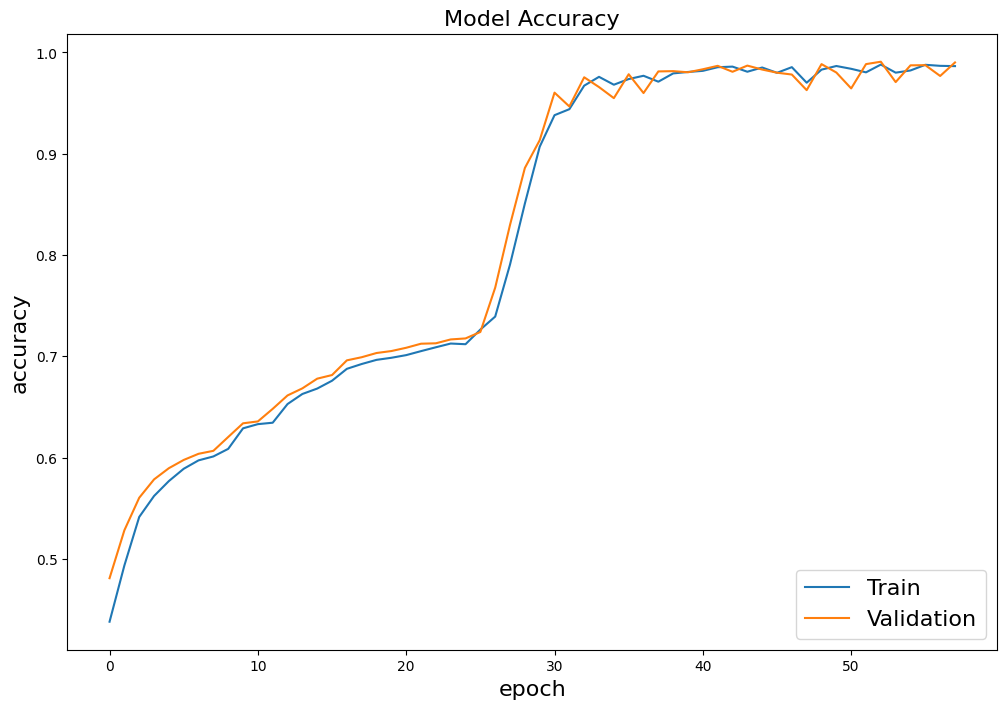

In [64]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.xlabel('epoch',fontsize=16)
plt.legend(['Train','Validation'],loc='lower right',fontsize=16)
plt.show

In [65]:
history.history['loss']

[1.1912366151809692,
 1.0817506313323975,
 1.0146187543869019,
 0.9611552953720093,
 0.9379338622093201,
 0.9176316261291504,
 0.8951364755630493,
 0.8703235387802124,
 0.8421531915664673,
 0.8207802176475525,
 0.7964451313018799,
 0.774581789970398,
 0.7448907494544983,
 0.717021107673645,
 0.6903656721115112,
 0.668113648891449,
 0.6317468881607056,
 0.6141647100448608,
 0.6032509207725525,
 0.5968133211135864,
 0.5934165120124817,
 0.5880217552185059,
 0.583189070224762,
 0.5715332627296448,
 0.5576052069664001,
 0.5374839901924133,
 0.5196593999862671,
 0.47759461402893066,
 0.4012417495250702,
 0.28547292947769165,
 0.21448960900306702,
 0.19652804732322693,
 0.1409550905227661,
 0.10340750962495804,
 0.1332111954689026,
 0.11041289567947388,
 0.09882985800504684,
 0.12419147044420242,
 0.09366527944803238,
 0.0840587466955185,
 0.07719146460294724,
 0.0654984638094902,
 0.06216134876012802,
 0.08510513603687286,
 0.06734703481197357,
 0.09482487291097641,
 0.06761765480041504,
 0

<function matplotlib.pyplot.show(close=None, block=None)>

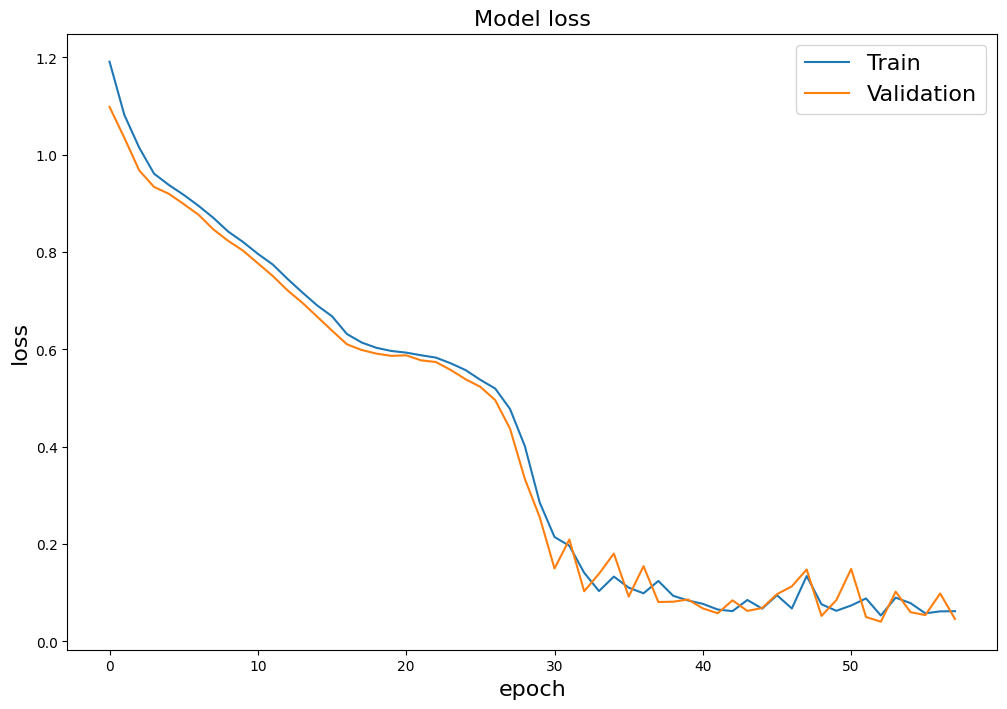

In [66]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss",fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.xlabel('epoch',fontsize=16)
plt.legend(['Train','Validation'],loc='upper right',fontsize=16)
plt.show

In [67]:
len(y_test),len(y_pred)

(79323, 79323)

In [68]:
y_pred

array([[9.9491018e-01, 5.0721159e-03, 1.7637170e-05, 3.2453720e-08],
       [2.8838752e-08, 3.3978497e-05, 3.9198399e-03, 9.9604607e-01],
       [9.9586624e-01, 4.1188928e-03, 1.4977969e-05, 2.6499098e-08],
       ...,
       [9.9824786e-01, 1.7444561e-03, 7.7893628e-06, 1.1521316e-08],
       [2.8838809e-08, 3.3978497e-05, 3.9198422e-03, 9.9604613e-01],
       [9.9751341e-01, 2.4764233e-03, 1.0126011e-05, 1.6170681e-08]],
      dtype=float32)

In [69]:
new_y_pred=[np.argmax(i) for i in y_pred]
new_y_test=[np.argmax(i) for i in y_test]
print(new_y_pred[0:30])
print(new_y_test[0:30])


[0, 3, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 3, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 3, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 3, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 3, 0, 0, 0]


In [70]:
CM=confusion_matrix(new_y_test,new_y_pred)
print("confusion_matrix : \n",CM)

confusion_matrix : 
 [[31624     1     0     0]
 [  174 17710    89     0]
 [    0   174 15001    98]
 [    0     0   191 14261]]


<function matplotlib.pyplot.show(close=None, block=None)>

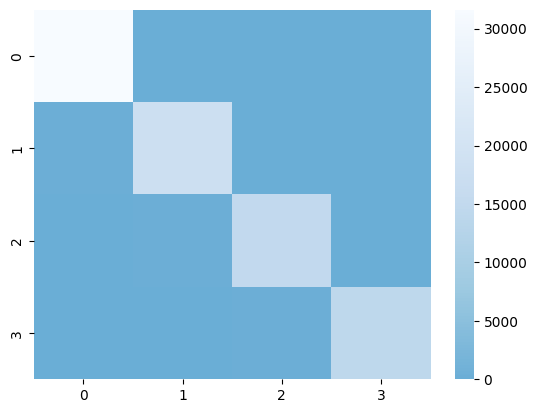

In [71]:
sns.heatmap(CM,center=True,cmap="Blues_r")
plt.show

In [72]:
Classification_Report=classification_report(new_y_test,new_y_pred)
print("classification report is : \n",Classification_Report)

classification report is : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31625
           1       0.99      0.99      0.99     17973
           2       0.98      0.98      0.98     15273
           3       0.99      0.99      0.99     14452

    accuracy                           0.99     79323
   macro avg       0.99      0.99      0.99     79323
weighted avg       0.99      0.99      0.99     79323



# Regression :

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [74]:

df

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,2
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,2
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [75]:
X=df.drop('arr_flights',axis=1)
y=df['arr_flights']

In [76]:
X

,year,month,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,2
318013,2003,6,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,2
318014,2003,6,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [77]:

y

0          136.0
1           91.0
2           19.0
3           88.0
4          181.0
           ...  
318012     480.0
318013     505.0
318014     146.0
318015      95.0
318016    3466.0
Name: arr_flights, Length: 317289, dtype: float64

In [78]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [79]:
kerasmodel=Sequential([
    #Input(shape=(17)),
    Dense(8,activation='tanh'),
    Dense(128,activation='tanh'),
    Dense(64,activation='tanh'),
    Dropout(0.2),
    Dense(1,activation='linear')
])

In [80]:
kerasmodel.compile(optimizer='adam',loss='mse',metrics=['mse'])
# loss function , metrics :
# regression : mse  ,mse
# Binary classification : binary_crossentropy , accuracy
# Multi classification  : categorical_crossentropy , accuracy

In [81]:
history=kerasmodel.fit(X_train,y_train,
                       validation_data=(X_test,y_test),
                       epochs=200,
                       batch_size=10000,
                       verbose=1,
                       callbacks=[EarlyStopping(
                       patience=5,
                       monitor='val_loss',#"Regression":"val_loss",
                       restore_best_weights=True)])

Epoch 1/200
24/24 [==============================] - 2s 40ms/step - loss: 1192885.6250 - mse: 1192885.6250 - val_loss: 1215043.2500 - val_mse: 1215043.2500
Epoch 2/200
24/24 [==============================] - 1s 31ms/step - loss: 1188994.2500 - mse: 1188994.2500 - val_loss: 1212217.7500 - val_mse: 1212217.7500
Epoch 3/200
24/24 [==============================] - 1s 35ms/step - loss: 1186622.2500 - mse: 1186622.2500 - val_loss: 1210192.2500 - val_mse: 1210192.2500
Epoch 4/200
24/24 [==============================] - 1s 35ms/step - loss: 1184827.5000 - mse: 1184827.5000 - val_loss: 1208616.5000 - val_mse: 1208616.5000
Epoch 5/200
24/24 [==============================] - 2s 78ms/step - loss: 1183373.2500 - mse: 1183373.2500 - val_loss: 1207233.7500 - val_mse: 1207233.7500
Epoch 6/200
24/24 [==============================] - 2s 103ms/step - loss: 1182033.7500 - mse: 1182033.7500 - val_loss: 1205931.2500 - val_mse: 1205931.2500
Epoch 7/200
24/24 [==============================] - 2s 80ms/st

In [82]:
print(kerasmodel.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 144       
                                                                 
 dense_15 (Dense)            (None, 128)               1152      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9617 (37.57 KB)
Trainable params: 9617 (37.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [83]:
y_Pred=kerasmodel.predict(X_test)

2479/2479 [==============================] - 4s 2ms/step


In [84]:
ModelLoss ,ModelAccuracy=kerasmodel.evaluate(X_test,y_test)
print(f"Loss : {ModelLoss} ")
print(f"Accuracy : {ModelAccuracy}")

2479/2479 [==============================] - 4s 1ms/step - loss: 1049215.8750 - mse: 1049215.8750
Loss : 1049215.875 
Accuracy : 1049215.875


In [85]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


In [86]:
history.history['loss']

[1192885.625,
 1188994.25,
 1186622.25,
 1184827.5,
 1183373.25,
 1182033.75,
 1180746.75,
 1179525.0,
 1178317.5,
 1177126.875,
 1175957.25,
 1174790.375,
 1173679.875,
 1172566.625,
 1171460.625,
 1170355.25,
 1169265.0,
 1168198.0,
 1167115.5,
 1166045.875,
 1165022.875,
 1163934.875,
 1162905.75,
 1161857.75,
 1160827.25,
 1159806.75,
 1158785.75,
 1157800.25,
 1156808.25,
 1155799.625,
 1154827.25,
 1153849.625,
 1152900.625,
 1151889.375,
 1150934.75,
 1149969.125,
 1149013.0,
 1148030.75,
 1147153.375,
 1146203.5,
 1145252.125,
 1144327.5,
 1143420.5,
 1142458.125,
 1141605.5,
 1140680.0,
 1139784.625,
 1138901.5,
 1137928.75,
 1137079.375,
 1136223.5,
 1135318.0,
 1134449.625,
 1133568.75,
 1132656.125,
 1131830.125,
 1130953.75,
 1130033.375,
 1129231.625,
 1128385.125,
 1127524.625,
 1126670.25,
 1125776.75,
 1124990.5,
 1124170.5,
 1123351.125,
 1122489.0,
 1121669.5,
 1120856.0,
 1120052.125,
 1119204.375,
 1118352.75,
 1117584.5,
 1116725.25,
 1115919.75,
 1115072.5,
 1114

<function matplotlib.pyplot.show(close=None, block=None)>

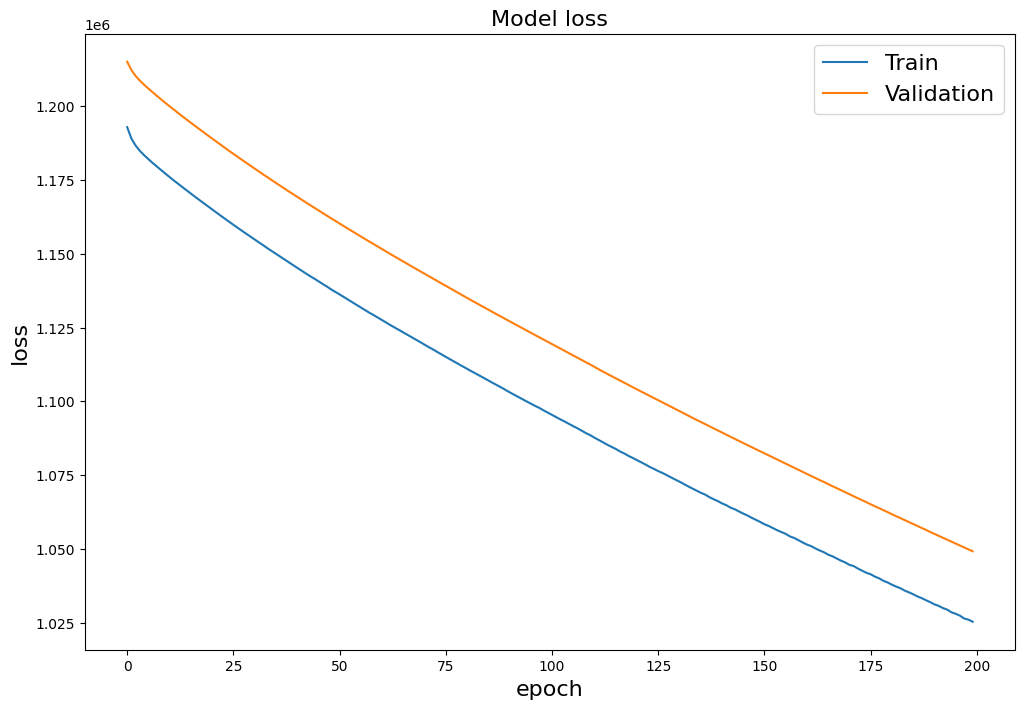

In [87]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss",fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.xlabel('epoch',fontsize=16)
plt.legend(['Train','Validation'],loc='upper right',fontsize=16)
plt.show

In [88]:
len(y_test),len(y_Pred)

(79323, 79323)

In [89]:
y_Pred

array([[ 45.96381 ],
       [301.6847  ],
       [ 43.686237],
       ...,
       [141.06163 ],
       [301.6332  ],
       [ 61.625523]], dtype=float32)

In [90]:
print("Mean Absolute Error Value is : ",mean_absolute_error(y_test,y_Pred))
print("Mean Squared Error Value is : ",mean_absolute_error(y_test,y_Pred))
print("Median Absolute Error Value is : ",mean_absolute_error(y_test,y_Pred))
print("R2 Squared Value is :",r2_score(y_test,y_Pred))

Mean Absolute Error Value is :  266.1745342253052
Mean Squared Error Value is :  266.1745342253052
Median Absolute Error Value is :  266.1745342253052
R2 Squared Value is : 0.02304153745697546
